<a href="https://colab.research.google.com/github/SACHIN-panwar/REACT-BASICS/blob/main/Train_plant_disease_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import files
files.upload()


Saving kaggle (2).json to kaggle (2).json


{'kaggle (2).json': b'{"username":"sachupanwar","key":"2b9cc126dde26af68c48b1bdaaf31329"}'}

In [ ]:
!mv "kaggle (2).json" kaggle.json
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json


In [ ]:
!kaggle datasets download -d vipoooool/new-plant-diseases-dataset -p /content/drive/MyDrive/plant_disease_dataset


Dataset URL: https://www.kaggle.com/datasets/vipoooool/new-plant-diseases-dataset
License(s): copyright-authors
new-plant-diseases-dataset.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip /content/drive/MyDrive/plant_disease_dataset/new-plant-diseases-dataset.zip -d /content/plant_disease_dataset/


Streaming output truncated to the last 5000 lines.
  inflating: /content/plant_disease_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/273a7a9e-18be-4b6a-976a-fa5ffd69b731___RS_HL 4366_90deg.JPG  
  inflating: /content/plant_disease_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_90deg.JPG  
  inflating: /content/plant_disease_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/275f8963-f4f4-4903-962b-1da716725d08___RS_HL 4780_new30degFlipLR.JPG  
  inflating: /content/plant_disease_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/valid/Strawberry___healthy/27c2aaa4-de4b-4fb1-ba8d-14d4b24b2afa___RS_HL 4665.JPG  
  inflating: /content/plant_disease_dataset/new plant diseases dataset(augmented)/New Plant Diseases Dataset(A

In [26]:
training_set=tf.keras.utils.image_dataset_from_directory(
    '/content/plant_disease_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/train',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 70295 files belonging to 38 classes.


In [27]:
validation_set=tf.keras.utils.image_dataset_from_directory(
    '/content/plant_disease_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    pad_to_aspect_ratio=False,
    verbose=True,
)

Found 17572 files belonging to 38 classes.


In [28]:
training_set

<_PrefetchDataset element_spec=(TensorSpec(shape=(None, 128, 128, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 38), dtype=tf.float32, name=None))>

In [29]:
for x, y in training_set:
  print(x, x.shape)
  print(y, y.shape)
  break;

tf.Tensor(
[[[[189.   178.   172.  ]
   [188.75 177.75 171.75]
   [192.25 181.25 175.25]
   ...
   [184.75 169.75 164.75]
   [190.75 175.75 170.75]
   [188.5  173.5  168.5 ]]

  [[195.   184.   178.  ]
   [195.25 184.25 178.25]
   [191.75 180.75 174.75]
   ...
   [189.75 174.75 169.75]
   [189.75 174.75 169.75]
   [181.5  166.5  161.5 ]]

  [[190.25 179.25 173.25]
   [192.5  181.5  175.5 ]
   [186.5  175.5  169.5 ]
   ...
   [186.   173.   167.  ]
   [180.75 167.75 161.75]
   [185.   172.   166.  ]]

  ...

  [[189.25 176.25 170.25]
   [177.75 164.75 158.75]
   [186.5  173.5  167.5 ]
   ...
   [195.25 184.25 180.25]
   [212.75 201.75 197.75]
   [183.5  172.5  168.5 ]]

  [[190.   177.   171.  ]
   [199.5  186.5  180.5 ]
   [184.5  171.5  165.5 ]
   ...
   [195.25 184.25 180.25]
   [178.   167.   163.  ]
   [178.   167.   163.  ]]

  [[175.25 162.25 156.25]
   [182.   169.   163.  ]
   [183.75 170.75 164.75]
   ...
   [183.75 172.75 168.75]
   [171.75 160.75 156.75]
   [173.75 162.75 15

In [30]:
from tensorflow.keras.layers import Dense,Conv2D, MaxPool2D, Flatten, Dropout
from tensorflow.keras.models import Sequential

In [31]:
model =Sequential()

In [32]:
model.add(Conv2D(filters=32, kernel_size=3, padding='same', activation='relu', input_shape=[128, 128, 3]))
model.add(Conv2D(filters=32, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [33]:
model.add(Conv2D(filters=64, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [34]:
model.add(Conv2D(filters=128, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=128, kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [35]:
model.add(Conv2D(filters=256, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=256, kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [36]:

model.add(Conv2D(filters=512, kernel_size=3, padding='same', activation='relu'))
model.add(Conv2D(filters=512, kernel_size=3,  activation='relu'))
model.add(MaxPool2D(pool_size=2, strides=2))

In [37]:
model.add(Dropout(0.25))

In [38]:
model.add(Flatten())

In [39]:
model.add(Dense(units=1500, activation='relu'))

In [40]:
model.add(Dropout(0.4))

In [41]:
model.add(Dense(units=38, activation='softmax'))

In [42]:
model.compile(optimizer=tf.keras.optimizers.Adam(
    learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [43]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_11 (Conv2D)              │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_12 (Conv2D)              │ (None, 126, 126, 32)   │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 63, 63, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 61, 61, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_15 (Conv2D)              │ (None, 30, 30, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_16 (Conv2D)              │ (None, 28, 28, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_17 (Conv2D)              │ (None, 14, 14, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_18 (Conv2D)              │ (None, 12, 12, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 6, 6, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_19 (Conv2D)              │ (None, 6, 6, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_20 (Conv2D)              │ (None, 4, 4, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1500)           │     3,073,500 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 1500)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 38)             │        57,038 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,842,762 (29.92 MB)

 Trainable params: 7,842,762 (29.92 MB)

 Non-trainable params: 0 (0.00 B)

##Model training

In [44]:
training_history = model.fit(x=training_set,validation_data=validation_set,epochs=10)

Epoch 1/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 164s 68ms/step - accuracy: 0.4086 - loss: 2.0784 - val_accuracy: 0.8084 - val_loss: 0.6262
Epoch 2/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 186s 66ms/step - accuracy: 0.8399 - loss: 0.5080 - val_accuracy: 0.9203 - val_loss: 0.2425
Epoch 3/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 61ms/step - accuracy: 0.9072 - loss: 0.2889 - val_accuracy: 0.9423 - val_loss: 0.1819
Epoch 4/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9369 - loss: 0.1952 - val_accuracy: 0.9368 - val_loss: 0.2021
Epoch 5/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 192s 61ms/step - accuracy: 0.9519 - loss: 0.1460 - val_accuracy: 0.9564 - val_loss: 0.1342
Epoch 6/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 0.9644 - loss: 0.1079 - val_accuracy: 0.9546 - val_loss: 0.1460
Epoch 7/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 135s 62ms/step - accuracy: 0.9703 - loss: 0.0906 - val_accuracy: 0.9606 - val_loss: 0.1313
Epoch 8/10
2197/2197 ━━━━━━━━━━━━━━━━━━━━ 145s 66ms/step - accuracy: 

Model Evaluation

In [45]:
#Model Evaluation on Training set
train_loss,train_acc = model.evaluate(training_set)

2197/2197 ━━━━━━━━━━━━━━━━━━━━ 47s 21ms/step - accuracy: 0.9933 - loss: 0.0214


In [46]:
print(train_loss,train_acc)

0.018797818571329117 0.9938828945159912


In [47]:
#Model on Validation set
val_loss,val_acc = model.evaluate(validation_set)

550/550 ━━━━━━━━━━━━━━━━━━━━ 11s 21ms/step - accuracy: 0.9728 - loss: 0.0996


In [48]:
print(val_loss,val_acc)

0.09880395233631134 0.9720008969306946


##Saving Model

In [49]:
model.save("trained_model.keras")

In [50]:
training_history.history

{'accuracy': [0.6060743927955627,
  0.8635464906692505,
  0.9162102341651917,
  0.9425278902053833,
  0.9564691781997681,
  0.9658012390136719,
  0.9728429913520813,
  0.9774521589279175,
  0.9804537892341614,
  0.9825023412704468],
 'loss': [1.3230630159378052,
  0.4318881332874298,
  0.25940316915512085,
  0.1772826462984085,
  0.1331598311662674,
  0.10278850793838501,
  0.08300957083702087,
  0.06873301416635513,
  0.060538019984960556,
  0.054196540266275406],
 'val_accuracy': [0.8084452748298645,
  0.9203277826309204,
  0.9422945380210876,
  0.9367744326591492,
  0.9563510417938232,
  0.9545868635177612,
  0.9606191515922546,
  0.9478147029876709,
  0.9718871116638184,
  0.9720008969306946],
 'val_loss': [0.6262150406837463,
  0.24247367680072784,
  0.1819486916065216,
  0.20207710564136505,
  0.13419170677661896,
  0.14596383273601532,
  0.1312597692012787,
  0.18219731748104095,
  0.0922790989279747,
  0.09880398213863373]}

In [51]:
#Recording History in json
import json
with open("training_hist.json","w") as f:
    json.dump(training_history.history,f)

In [52]:
training_history.history['val_accuracy']

[0.8084452748298645,
 0.9203277826309204,
 0.9422945380210876,
 0.9367744326591492,
 0.9563510417938232,
 0.9545868635177612,
 0.9606191515922546,
 0.9478147029876709,
 0.9718871116638184,
 0.9720008969306946]

##Accuracy Visualization

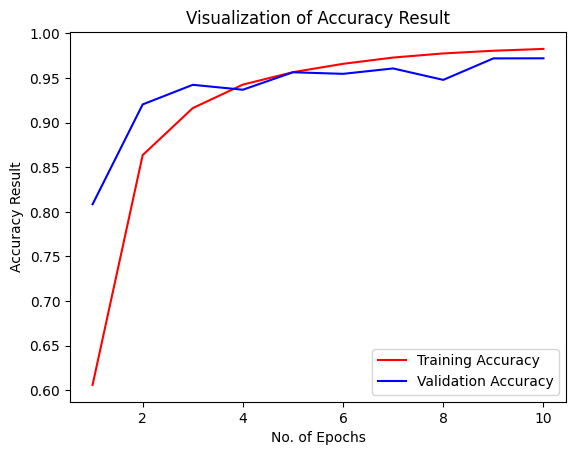

In [53]:
epochs = [i for i in range(1,11)]
plt.plot(epochs,training_history.history['accuracy'],color='red',label='Training Accuracy')
plt.plot(epochs,training_history.history['val_accuracy'],color='blue',label='Validation Accuracy')
plt.xlabel("No. of Epochs")
plt.ylabel("Accuracy Result")
plt.title("Visualization of Accuracy Result")
plt.legend()
plt.show()

##some other metrics for model evaluation

In [54]:
class_name = validation_set.class_names
class_name

['Apple___Apple_scab',
 'Apple___Black_rot',
 'Apple___Cedar_apple_rust',
 'Apple___healthy',
 'Blueberry___healthy',
 'Cherry_(including_sour)___Powdery_mildew',
 'Cherry_(including_sour)___healthy',
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot',
 'Corn_(maize)___Common_rust_',
 'Corn_(maize)___Northern_Leaf_Blight',
 'Corn_(maize)___healthy',
 'Grape___Black_rot',
 'Grape___Esca_(Black_Measles)',
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)',
 'Grape___healthy',
 'Orange___Haunglongbing_(Citrus_greening)',
 'Peach___Bacterial_spot',
 'Peach___healthy',
 'Pepper,_bell___Bacterial_spot',
 'Pepper,_bell___healthy',
 'Potato___Early_blight',
 'Potato___Late_blight',
 'Potato___healthy',
 'Raspberry___healthy',
 'Soybean___healthy',
 'Squash___Powdery_mildew',
 'Strawberry___Leaf_scorch',
 'Strawberry___healthy',
 'Tomato___Bacterial_spot',
 'Tomato___Early_blight',
 'Tomato___Late_blight',
 'Tomato___Leaf_Mold',
 'Tomato___Septoria_leaf_spot',
 'Tomato___Spider_mites Two-spotted_

In [56]:
test_set = tf.keras.utils.image_dataset_from_directory(
    '/content/plant_disease_dataset/New Plant Diseases Dataset(Augmented)/New Plant Diseases Dataset(Augmented)/valid',
    labels="inferred",
    label_mode="categorical",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(128, 128),
    shuffle=False,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
)

Found 17572 files belonging to 38 classes.


In [57]:
y_pred = model.predict(test_set)
y_pred,y_pred.shape

550/550 ━━━━━━━━━━━━━━━━━━━━ 14s 24ms/step


(array([[9.99998808e-01, 7.84784447e-07, 8.79315856e-11, ...,
         8.81166142e-18, 5.09385200e-17, 3.06337021e-14],
        [9.99994755e-01, 5.15518786e-06, 5.15527508e-12, ...,
         7.02422172e-18, 2.66812020e-17, 2.21822682e-14],
        [1.00000000e+00, 7.59656921e-11, 1.00565842e-14, ...,
         2.81178118e-21, 9.87857668e-20, 3.83137056e-17],
        ...,
        [1.23555680e-10, 1.28579677e-12, 6.33741459e-09, ...,
         2.39733372e-11, 1.40618376e-11, 9.99999881e-01],
        [1.59838112e-13, 2.24351400e-17, 3.34878219e-12, ...,
         1.08366575e-14, 5.86642356e-15, 1.00000000e+00],
        [6.70796327e-19, 5.05066336e-20, 9.92906579e-17, ...,
         2.11625412e-18, 2.17515931e-18, 1.00000000e+00]], dtype=float32),
 (17572, 38))

In [58]:
predicted_categories = tf.argmax(y_pred,axis=1)

In [59]:
predicted_categories

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [60]:
true_categories = tf.concat([y for x,y in test_set],axis=0)
true_categories

<tf.Tensor: shape=(17572, 38), dtype=float32, numpy=
array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 1.]], dtype=float32)>

In [61]:
Y_true = tf.argmax(true_categories,axis=1)
Y_true

<tf.Tensor: shape=(17572,), dtype=int64, numpy=array([ 0,  0,  0, ..., 37, 37, 37])>

In [62]:
from sklearn.metrics import classification_report,confusion_matrix

In [63]:
print(classification_report(Y_true,predicted_categories,target_names=class_name))

                                                    precision    recall  f1-score   support

                                Apple___Apple_scab       0.94      0.98      0.96       504
                                 Apple___Black_rot       0.99      0.99      0.99       497
                          Apple___Cedar_apple_rust       0.99      0.99      0.99       440
                                   Apple___healthy       0.95      0.97      0.96       502
                               Blueberry___healthy       0.98      0.95      0.96       454
          Cherry_(including_sour)___Powdery_mildew       0.99      0.98      0.98       421
                 Cherry_(including_sour)___healthy       0.96      0.99      0.98       456
Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot       0.93      0.92      0.93       410
                       Corn_(maize)___Common_rust_       0.99      1.00      0.99       477
               Corn_(maize)___Northern_Leaf_Blight       0.94      0.96      0.

In [64]:
cm = confusion_matrix(Y_true,predicted_categories)
cm

array([[494,   0,   0, ...,   0,   0,   0],
       [  2, 490,   0, ...,   0,   0,   0],
       [  0,   0, 435, ...,   0,   1,   1],
       ...,
       [  0,   0,   0, ..., 483,   0,   0],
       [  0,   0,   0, ...,   0, 448,   0],
       [  0,   0,   0, ...,   0,   0, 476]])

##confusion Matrix Visualization

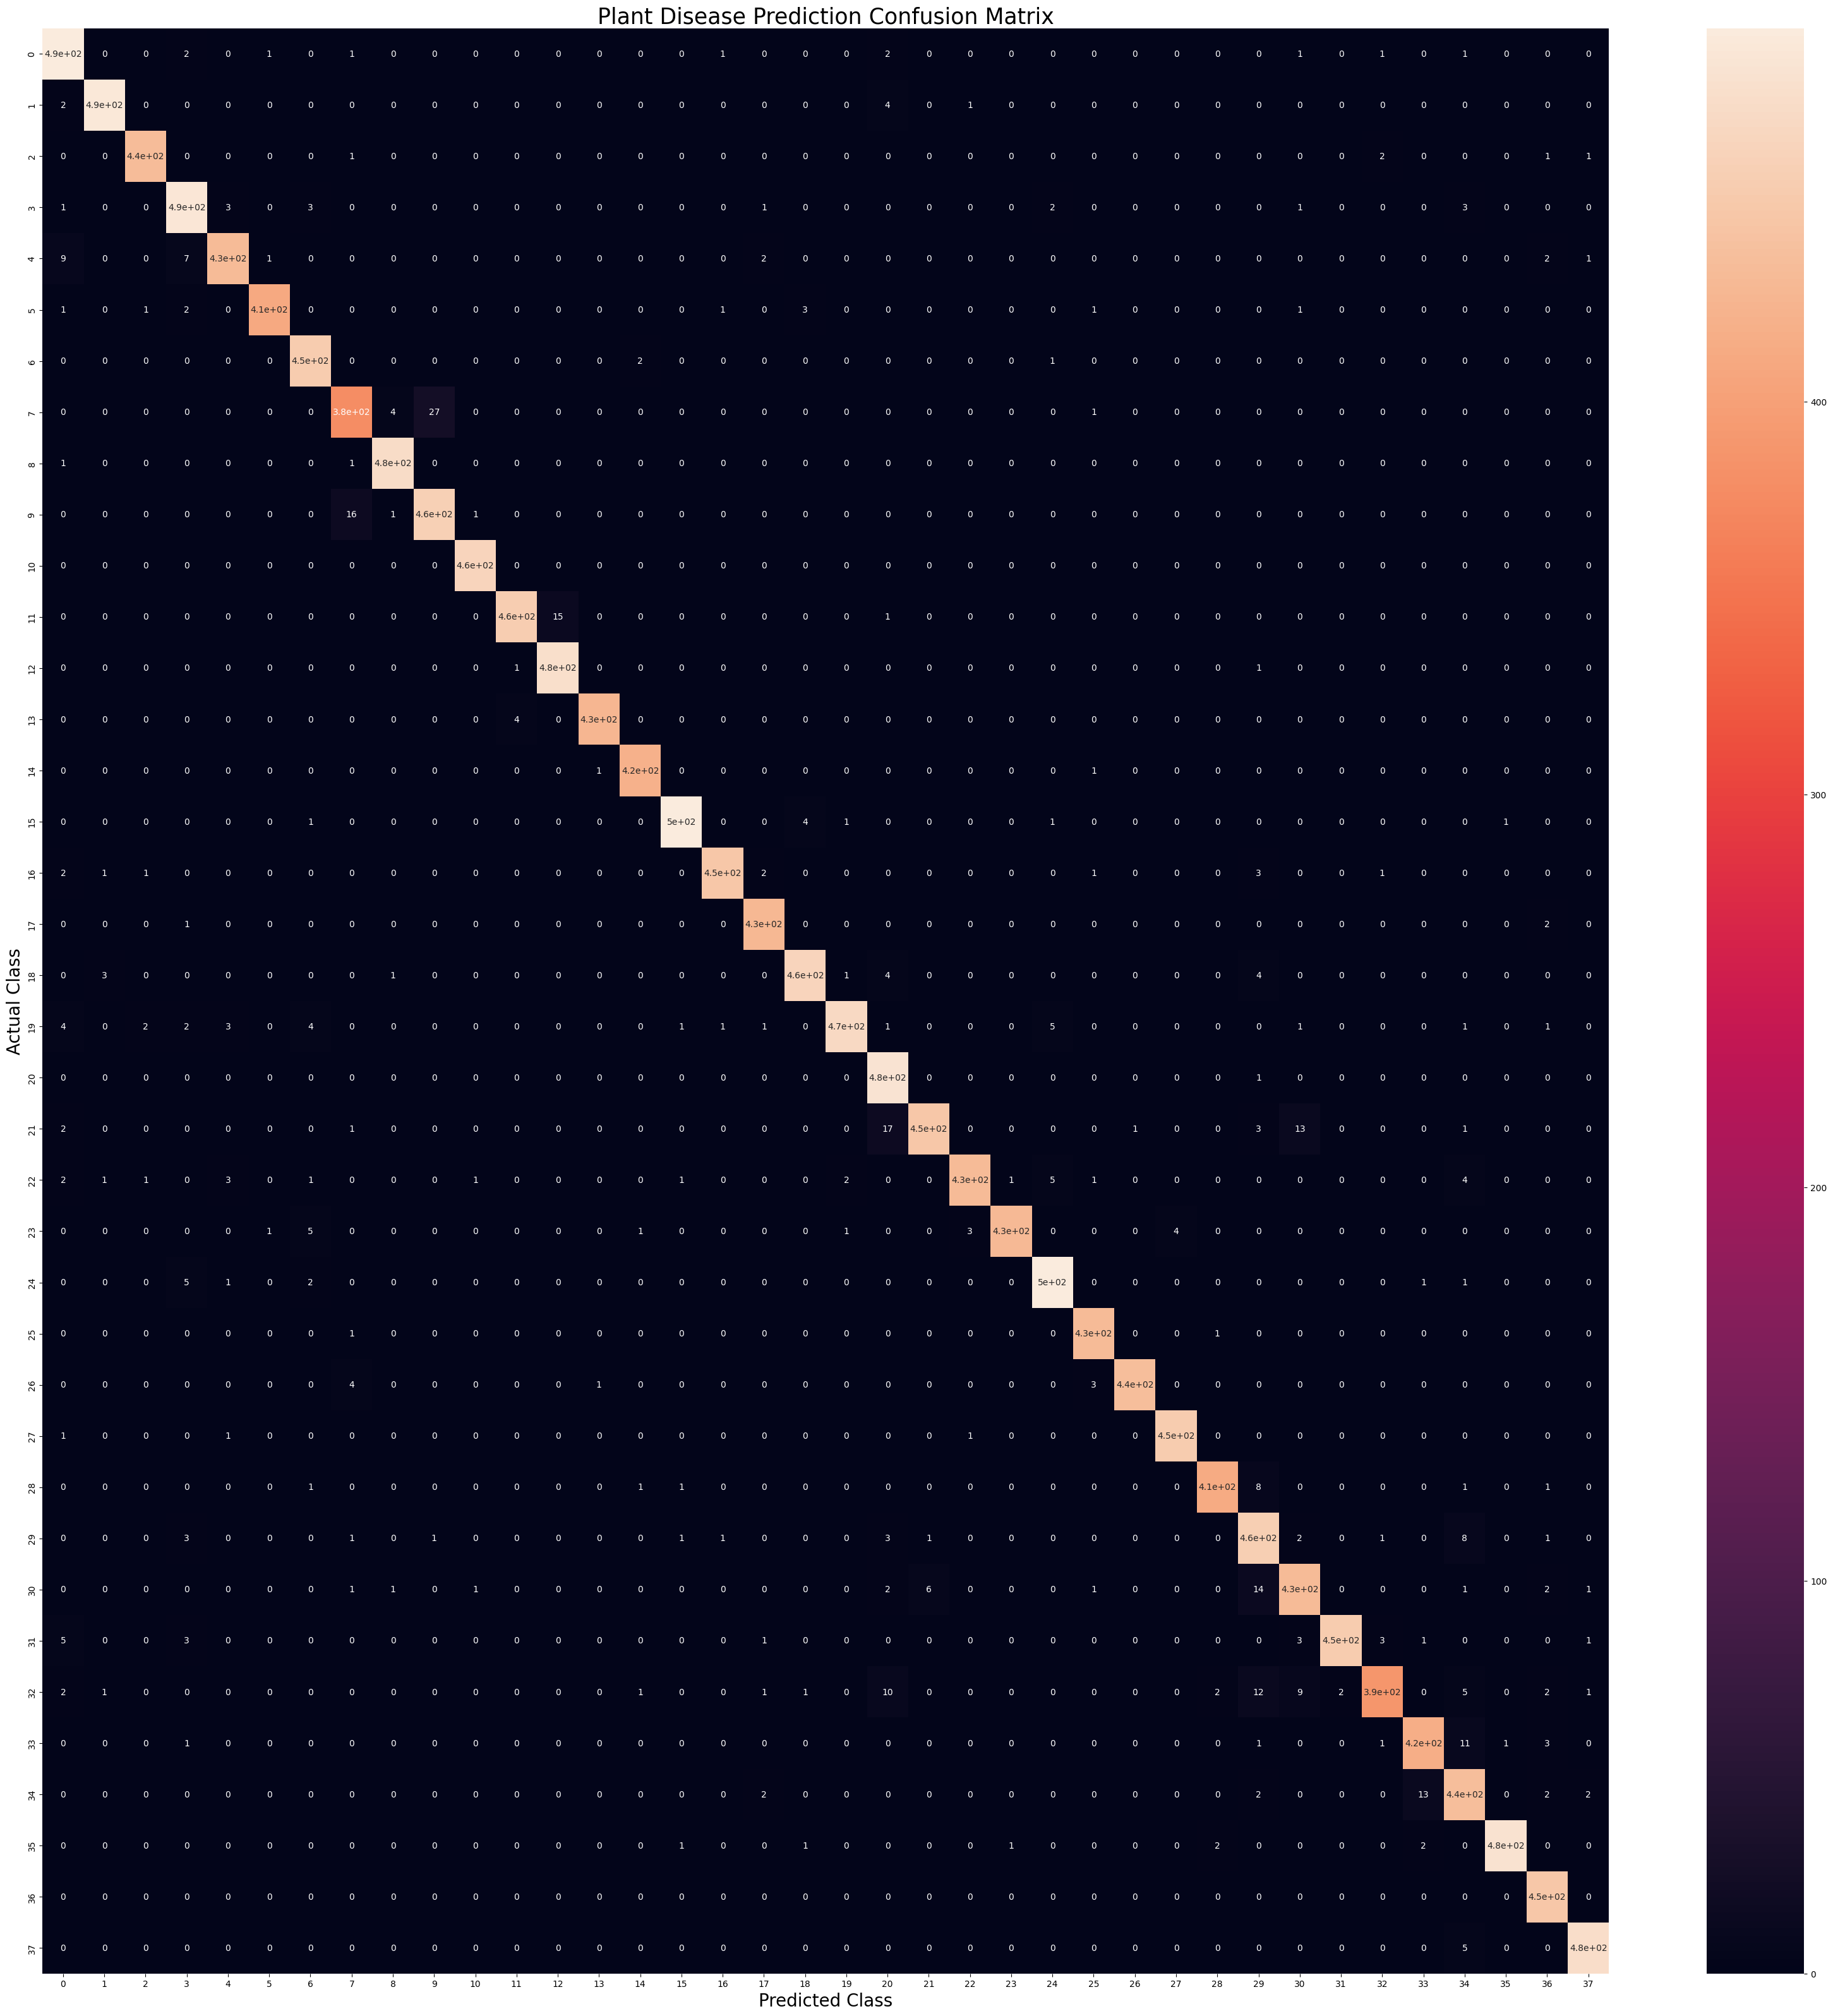

In [65]:
plt.figure(figsize=(40,40))
sns.heatmap(cm,annot=True,annot_kws={'size':10})
plt.xlabel("Predicted Class",fontsize=20)
plt.ylabel("Actual Class",fontsize=20)
plt.title("Plant Disease Prediction Confusion Matrix",fontsize=25)
plt.show()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


<IPython.core.display.Javascript object>

Reinitialized existing Git repository in /content/.git/
fatal: pathspec 'Train_plant_disease_detection.ipynb' did not match any files
On branch main

Initial commit

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	.config/
	drive/
	sample_data/

nothing added to commit but untracked files present (use "git add" to track)
error: remote origin already exists.
error: src refspec main does not match any
error: failed to push some refs to 'https://github.com/SACHIN-panwar/Plant_disease_detection.git'
